In [1]:
import sys
sys.path.append('../')
from Code.everything4 import LIFNeuron, ParallelNetwork, OuterWrapper, SequenceWrapper, DynNetwork
import torch
from torch.distributions.normal import Normal
from torch.distributions.uniform import Uniform
import matplotlib.pyplot as plt
import numpy as np

In [2]:
BATCH_SIZE = 128#1024
LENGTH = 2000 #1000
device = torch.device('cpu')

In [3]:
def do_test(beta, var, factor, mean=0, high=0, low=0, length=LENGTH):
    normal = Normal(mean,var)
    uni = Uniform(low, high)
    base_config = {
        'BETA': beta,
        'SPIKE_FN': 'ss',
        '1-beta': False
    }

    arch = {
        'input': 1,
        'output': [['input'], LIFNeuron(1, base_config), None]
    }

    model = OuterWrapper(SequenceWrapper(ParallelNetwork(arch, bias=False)), device)

    x = normal.sample((length, BATCH_SIZE, 1)) * factor + uni.sample((1, BATCH_SIZE, 1))

    out, _, log = model(x, logging=True)

    return log['output'].mean().item(), log['output']

In [51]:
res = []
adap = []
fac = []
stdd = 1#0.11**(0.5)#0.33 #0.4
for i in range(20):
    beta = 0.8 + i*0.01
    factor = ((1-beta**2))**(0.5)
    res.append(do_test(beta, stdd, 1))
    fac.append(do_test(beta, stdd, factor))
    adap.append(res[-1]/ fac[-1])



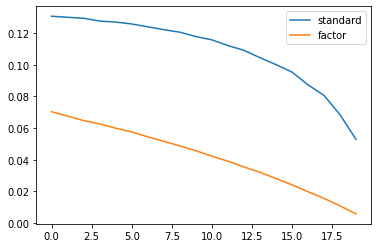

In [54]:
plt.plot(range(20), res, label='standard')
#plt.plot(range(20), adap, label='adapted')
plt.plot(range(20), fac, label='factor')
plt.legend()

In [6]:
Normal(0,0.5).sample([10000]).var()

tensor(0.2454)

In [7]:
(1/6)**(1/2)

0.408248290463863

In [8]:
top1 = torch.load('../models/top1_2')

/opt/conda/lib/python3.6/site-packages/torch/serialization.py:563: SourceChangeWarning: source code of class 'Code.NewNeurons2.LIFNeuron' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/opt/conda/lib/python3.6/site-packages/torch/serialization.py:563: SourceChangeWarning: source code of class 'Code.NewNeurons2.AdaptiveNeuron' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [9]:
top1.layers.loop.model.layers.control_synapse.weight.var()

tensor(1.0506, device='cuda:0', grad_fn=<VarBackward0>)

In [10]:
top1.layers.loop.model.layers.mem_synapse.weight.var()


tensor(1.2483, device='cuda:0', grad_fn=<VarBackward0>)

In [11]:
top1.layers.loop.model.layers.control_synapse.weight.max()

tensor(5.3135, device='cuda:0', grad_fn=<MaxBackward1>)

In [8]:
res

[(0.13975390791893005, tensor([[[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]],
  
          [[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [1.],
           [0.]],
  
          [[1.],
           [1.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]],
  
          ...,
  
          [[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]],
  
          [[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [1.]],
  
          [[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]]], grad_fn=<CopySlices>)), (0.13597264885902405, tensor([[[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]],
  
          [[0.],
           [0.],
           [1.],
           ...

In [33]:

res = []
fac = []
stdd = 0.3#0.11**(0.5)#0.33 #0.4
for i in range(21):
    beta = 1-np.exp(-i/4)#0.9+i*0.005
    #stdd = 1#i*0.05
    #length = int(10**(1+i*0.15))
    #beta = np.exp(-1/length)
    factor = ((1-beta**2))**(0.5)
    res.append(do_test(beta, stdd, 1, mean=0, high=(1-beta)*0, low=(1-beta)*0.0)[0])
    fac.append(do_test(beta, stdd, factor, mean=0, high=(1-beta)*0, low=(1-beta)*0.0)[0])

    #fac.append(do_test(beta, stdd, 1, mean=0, high=(1-beta)+0.03))
    #fac.append(do_test(beta, stdd, factor, mean=0))


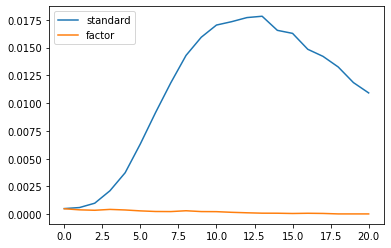

In [34]:
plt.plot(range(21), res, label='standard')
plt.plot(range(21), fac, label='factor')
plt.legend()

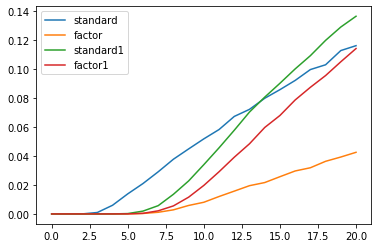

In [23]:
plt.plot(range(21), res, label='standard')
plt.plot(range(21), fac, label='factor')
plt.plot(range(21), res1, label='standard1')
plt.plot(range(21), fac1, label='factor1')
plt.legend()

In [21]:
res1 = res
fac1 = fac

In [30]:
1-np.exp(-7/4)

0.8262260565495548

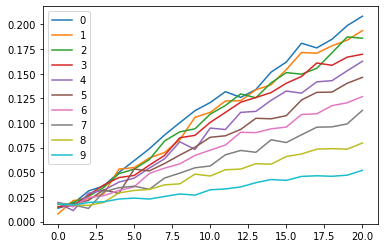

In [105]:

res = []
#stdd = 1
for k in range(10):
    beta = 0.5+0.05*k
    factor = ((1-beta**2))**(0.5)
    res.append([])
    for i in range(21):
        stdd = i*0.05
        res[k].append(do_test(beta, stdd, factor, mean=0, high=(1-beta)+0.03))
    plt.plot(range(21), res[k], label=str(k))
plt.legend()
        #fac.append(do_test(beta, stdd, factor, mean=0))

In [34]:
0.5 / factor

1.147078669352809

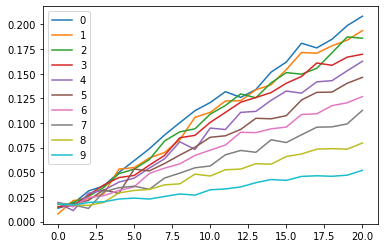

In [105]:

res = []
#stdd = 1
for k in range(10):
    beta = 0.5+0.05*k
    factor = ((1-beta**2))**(0.5)
    res.append([])
    for i in range(21):
        stdd = i*0.05
        res[k].append(do_test(beta, stdd, factor, mean=0, high=(1-beta)+0.03))
    plt.plot(range(21), res[k], label=str(k))
plt.legend()
        #fac.append(do_test(beta, stdd, factor, mean=0))

In [34]:
0.5 / factor

1.147078669352809

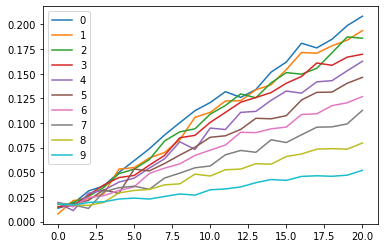

In [105]:

res = []
#stdd = 1
for k in range(10):
    beta = 0.5+0.05*k
    factor = ((1-beta**2))**(0.5)
    res.append([])
    for i in range(21):
        stdd = i*0.05
        res[k].append(do_test(beta, stdd, factor, mean=0, high=(1-beta)+0.03))
    plt.plot(range(21), res[k], label=str(k))
plt.legend()
        #fac.append(do_test(beta, stdd, factor, mean=0))

In [34]:
0.5 / factor

1.147078669352809

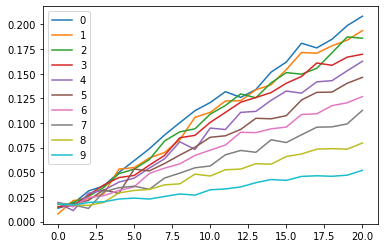

In [105]:

res = []
#stdd = 1
for k in range(10):
    beta = 0.5+0.05*k
    factor = ((1-beta**2))**(0.5)
    res.append([])
    for i in range(21):
        stdd = i*0.05
        res[k].append(do_test(beta, stdd, factor, mean=0, high=(1-beta)+0.03))
    plt.plot(range(21), res[k], label=str(k))
plt.legend()
        #fac.append(do_test(beta, stdd, factor, mean=0))

In [45]:
np.exp(-1/10)

0.9048374180359595

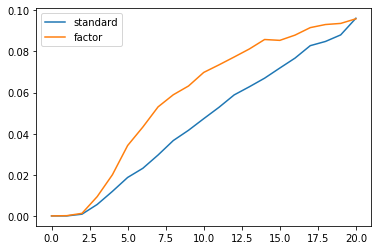

In [61]:
res = []
fac = []
stdd = 0.11**(0.5)#0.33 #0.4
for i in range(21):
    beta = 0.95#0.9
    stdd = 0.01+i*0.05
    length = 1000
    factor = ((1-beta**2))**(0.5)
    bias = (beta-1)/beta * ((1/stdd)-1)
    res.append(do_test(beta, stdd, 1, mean=0, high=(1-beta)*0, low=(1-beta)*0.0, length=length))
    fac.append(do_test(beta, 1, 1, mean=0, high=bias, low=bias, length=length))

    #fac.append(do_test(beta, stdd, 1, mean=0, high=(1-beta)+0.03))
    #fac.append(do_test(beta, stdd, factor, mean=0))

plt.plot(range(21), res, label='standard')
plt.plot(range(21), fac, label='factor')
plt.legend()

In [57]:
beta = 0.95
(beta-1)/beta

-0.052631578947368474

In [8]:
with torch.no_grad():
    _, out = do_test(0.9, 1, 1)

In [16]:
from PIL import Image
ar = out.squeeze()[:, 0].view(50,40) * 255
img = Image.fromarray(ar.numpy().astype(np.uint8), 'L')

In [18]:
img.size

(40, 50)

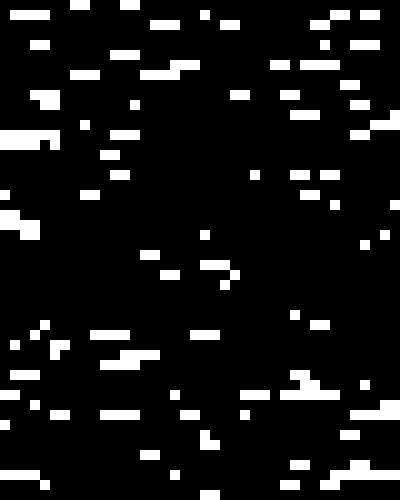

In [20]:
img.resize((400, 500))

In [11]:
base_config = {
    'BETA': 0.9,
    'SPIKE_FN': 'ss',
    '1-beta': False
}

arch = {
    'input': 1,
    'output': [['input'], LIFNeuron(1, base_config), None]
}

model = OuterWrapper(SequenceWrapper(DynNetwork(arch)), device)

inp = torch.tensor([0.1,0.1,0.1,0.1,0.1], requires_grad=True)

In [12]:
out, _ =model(inp.view(5,1,1))
(out[-1]*-1).backward()

In [13]:
inp.grad

tensor([-0.0800, -0.1036, -0.1374, -0.1870,  0.0000])

In [14]:
out

tensor([[[0.]],

        [[0.]],

        [[0.]],

        [[0.]],

        [[0.]]], grad_fn=<CopySlices>)

In [19]:

(inp+1).sum().backward()

In [21]:
inp.grad

In [34]:
neuron = LIFNeuron(1, base_config)

inp = torch.tensor([0.9], requires_grad=True)
with torch.no_grad():
    init = neuron.get_initial_state(1)
    init['mem'] += 0.5
_, state = neuron(inp, init)
out, _ = neuron(inp, state)

In [35]:
out.sum().backward()

In [36]:
inp = torch.tensor([0.9,0.3,0.1,0.1,0.1], requires_grad=True).view(5,1,1)

In [38]:
inp = torch.zeros(10, requires_grad=True).view(5,2)
inp.sum().backward()
print(inp.grad)

None


In [15]:
out

tensor([[[0.]],

        [[0.]],

        [[1.]],

        [[0.]],

        [[0.]]], grad_fn=<CopySlices>)

In [52]:
res0 = res


In [53]:
from torch.distributions.normal import Normal
import torch
import numpy as np
import matplotlib.pyplot as plt

In [54]:
res = []
for k in range(1, 200):
    factor = np.exp(-1/k)
    size = 10000
    batch_size = 100
    r_data = Normal(0, 1).sample([size, batch_size])
    sum = torch.empty_like(r_data)
    sum[0] = r_data[0]
    for i in range(1, size):
        sum[i] = sum[i-1]*factor + r_data[i]

    res.append((sum[5001:].sign() != sum[5000:-1].sign()).float().mean())


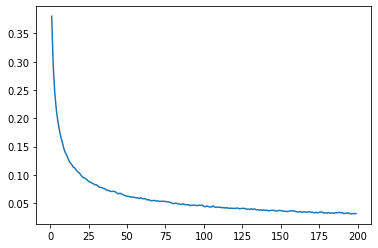

In [55]:
plt.plot(range(1, 200), res)

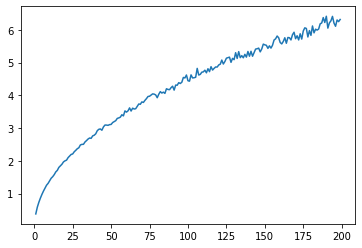

In [56]:
plt.plot(range(1, 200), np.array(res)*np.arange(1, 200))

In [57]:
MAIN_DECAY = np.exp(-1/(700)*0.5)
ADAP_DECAY = np.exp(-1/(700*2))

In [58]:
MAIN_DECAY

0.9992859693270274

In [59]:
ADAP_DECAY

0.9992859693270274

In [60]:
np.exp(-1/10)

0.9048374180359595

In [20]:
import torch
import numpy as np

In [21]:
thr = 10 / np.arange(1, 11, dtype=np.float)[::-1]

In [23]:
cum_inp = torch.cumsum(torch.from_numpy(thr), 0)

In [24]:
thr

array([ 1.        ,  1.11111111,  1.25      ,  1.42857143,  1.66666667,
        2.        ,  2.5       ,  3.33333333,  5.        , 10.        ])

In [25]:
cum_inp

tensor([ 1.0000,  2.1111,  3.3611,  4.7897,  6.4563,  8.4563, 10.9563, 14.2897,
        19.2897, 29.2897], dtype=torch.float64)